16.08.2021
Messung mit GY-521 Modul

Code von https://mschoeffler.com/2017/10/05/tutorial-how-to-use-the-gy-521-module-mpu-6050-breakout-board-with-the-arduino-uno/

Messintervall: 100ms

Messprotokoll:
20:00:10 - Stillstand
20:00:18 - Bewegung Z Achse (hoch-runter)
20:00:27 - Bewegung X-Achse (rechts-links)
20:00:36 - Bewegung Y-Achse (vor-zurück)
20:00:48 - Rotation um Y-Achse, -90° ... 90°
20:01:00 - Rotation um X-Achse, -90° ... 90°
20:01:13 - Drei Drehungen

aX/aY/aZ: Beschleunigungssensor
gX/gY/gZ: Gyrosensor
tmp: Temperatur

In [1]:
import numpy as np
ttd = lambda time: np.datetime64("2021-08-16T"+time.strip())
phases = [(ttd("20:00:10 "), "Stillstand"),
          (ttd("20:00:18 "), "Bewegung Z Achse (hoch-runter)"),
          (ttd("20:00:27 "), "Bewegung X-Achse (rechts-links)"),
          (ttd("20:00:36 "), "Bewegung Y-Achse (vor-zurück)"),
          (ttd("20:00:48 "), "Rotation um Y-Achse, -90° ... 90°"),
          (ttd("20:01:00 "), "Rotation um X-Achse, -90° ... 90°"),
          (ttd("20:01:13 "), "Drei Drehungen")
         ]

In [2]:
def parse_data(file="../../data/2021-08-16-Test-GY-521.txt"):
    with open(file, "r") as in_file:
        lines = in_file.readlines()
    data = []
    for line in lines:
        line = line.split("|")
        if len(line) == 7:
            to_float = lambda x: float(x.split("=")[-1])
            date, aX = line[0].split("->")
            date, aX = ttd(date), to_float(aX)
            aY, aZ, tmp, gX, gY, gZ = map(to_float, line[1:])
            data.append((date, aX, aY, aZ, tmp, gX, gY, gZ))
    return np.array(data)
data = parse_data()

<IPython.core.display.Javascript object>


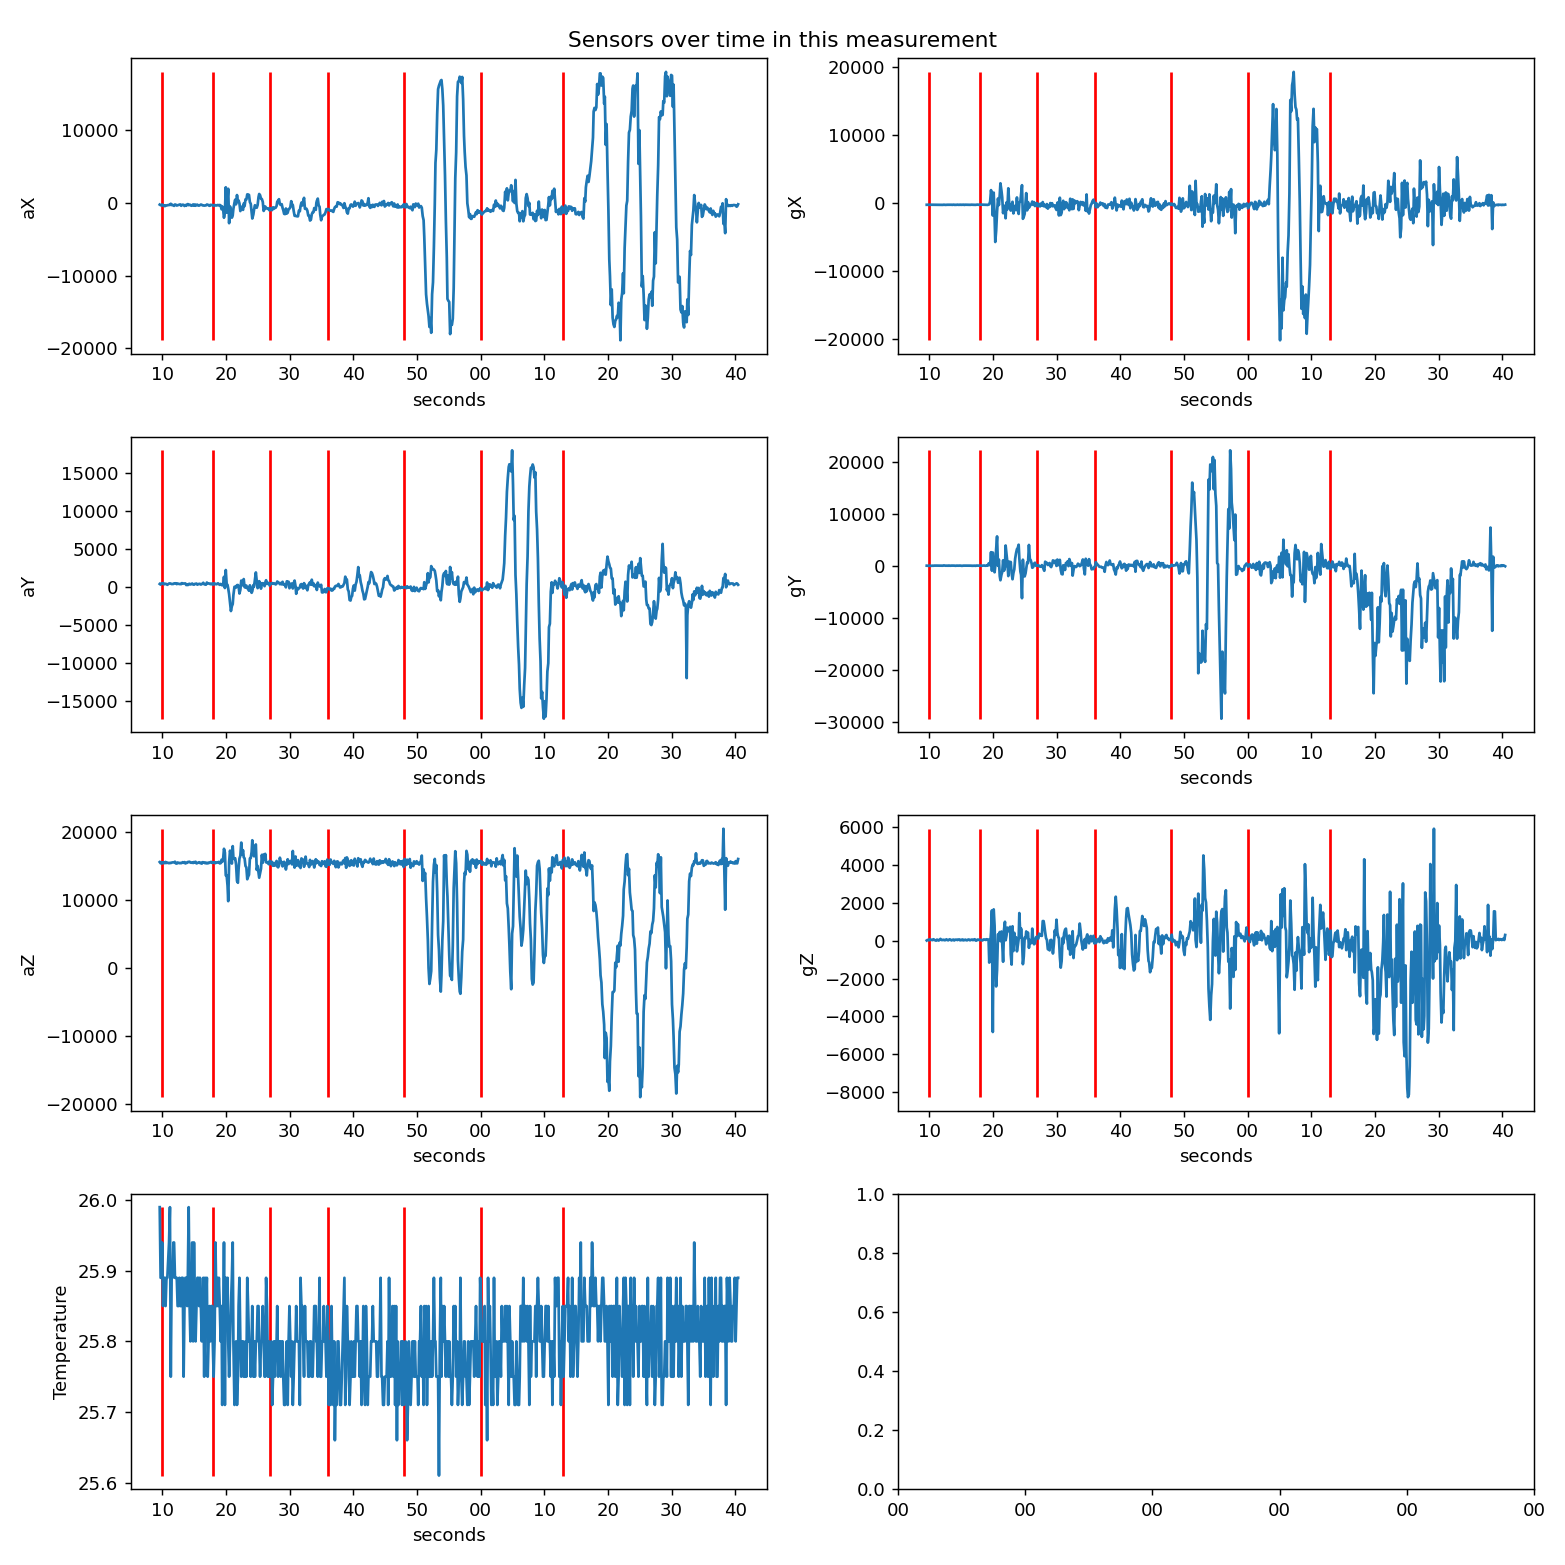

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%S')
dates, aX, aY, aZ, tmp, gX, gY, gZ = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7]
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
fig.suptitle("Sensors over time in this measurement")
sensor_titles = ["aX", "aY", "aZ", "Temperature", "gX", "gY", "gZ"]
for col in range(2):
    for row in range(4):
        i = 4*col + row
        ax = axs[row, col]
        ax.xaxis.set_major_formatter(myFmt)
        if i==7:
            break
        ax.plot(dates, data[:, i+1])
        for measurement_phase, description in phases:
            ax.vlines(measurement_phase, np.min(data[:, i+1]), np.max(data[:, i+1]), color="red")
        ax.set_ylabel(sensor_titles[i])
        ax.set_xlabel("seconds")
fig.tight_layout()
fig.savefig("sensor.png")